In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import rasterio

import os
import sys
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/Repos/observatorio-ciudades/accesibilidad-urbana/aup/data.py:24: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(


In [2]:
##### WARNING ##### WARNING ##### WARNING ##### WARNING ##### WARNING #####

# save output to database?
save = False
# How to save?
if_exists='append'
# save to local?
save_local = True
# use local data?
local_data = True
##### WARNING ##### WARNING ##### WARNING ##### WARNING ##### WARNING #####

In [3]:
# 'alex' or 'edgar'
all_local_dirs = 'edgar'
# Output hexs resolution
res = 10
# Area of analysis
area_of_analysis = 'zona_censal' # zona_censal, hexagonos, unidades_vecinales
# Persona speed
walk_speed = 4.5
speed_name = str(walk_speed).replace('.','_')

In [4]:
if all_local_dirs == 'alex':
    grl_dir = "../../../data/external/temporal_todocker/santiago/proximidad/"
elif all_local_dirs == 'edgar':
    grl_dir = "../../../data/processed/santiago/"
else:
    print("WARNING: Fix all_local_dirs variable")

In [5]:
if area_of_analysis == 'zona_censal' and local_data:
    gdf = gpd.read_file(grl_dir + f'santiago_zonascensalesanalysis_{speed_name}_kmh.geojson')

elif area_of_analysis == 'zona_censal' and not local_data:
    table = f'santiago_zonascensalesanalysis_{speed_name}_kmh'
    schema = 'projects_research'
    gdf = aup.gdf_from_db(table, schema)

elif area_of_analysis == 'unidades_vecinales' and local_data:
    gdf = gpd.read_file(grl_dir + f'santiago_unidadesvecinales_hqsl_{speed_name}_kmh.gpkg')

elif area_of_analysis == 'unidades_vecinales' and not local_data:
    table = f'santiago_unidadesvecinalesanalysis_{speed_name}_kmh'
    schema = 'projects_research'
    gdf = aup.gdf_from_db(table, schema)

elif area_of_analysis == 'hexagonos' and local_data:
    gdf = gpd.read_file(grl_dir + f'santiago_hexanalysis_res{res}_{speed_name}_kmh.geojson')

elif area_of_analysis == 'hexagonos' and not local_data:
    query = f'SELECT * FROM {schema}.santiago_hexanalysis_{speed_name}_kmh_pub WHERE res = {res}'
    gdf = aup.gdf_from_query(query)

print(gdf.shape)
gdf.head(2)

(1639, 38)


,geocodigo,gse_dom,gse_prom,ismtpn,dens_pobha,GEOCODI,prc_hg_,prc_cn_,prc_dmy,pr_JHES,...,wellbeing_working,wellbeing,supplying,caring,living,enjoying,learning,working,hqsl,geometry
0,13101011001,C1,C2,0.769388,103.946703,13101011001,0.763760,0.107536,0.133785,0.799323,...,5.196116,42.738248,7.581116,6.336907,5.599436,9.128404,4.462990,6.738089,39.846943,"POLYGON ((-70.64101 -33.43757, -70.64103 -33.4..."
1,13101011002,C1,C2,0.750089,226.888923,13101011002,0.827209,0.100078,0.076622,0.802971,...,5.074883,42.941134,8.236338,5.876095,6.304201,8.877243,4.428038,6.741553,40.463468,"POLYGON ((-70.64645 -33.43683, -70.64718 -33.4..."


## Zonas censales -- Alameda

In [6]:
alameda = gpd.read_file(grl_dir + 'zonas_censales_buffer800m_alameda.gpkg')
print(alameda.shape)
alameda.head(2)

(127, 2)


,geocodigo,geometry
0,13101011001,"MULTIPOLYGON (((-70.63925 -33.43663, -70.63932..."
1,13101011002,"MULTIPOLYGON (((-70.64645 -33.43683, -70.64718..."


## Group behaviour

In [7]:
col_analysis = ['gse_prom','ismtpn','dens_pobha','prc_hg_',
                  'prc_cn_','prc_dmy','pr_JHES','prc_OcA',
                  'sociability','wellbeing','environmental_impact',
                  'supplying','caring','living',
                  'enjoying','working','learning',
                  'hqsl']

In [8]:
gdf.loc[~gdf.geocodigo.isin(alameda.geocodigo), col_analysis].groupby('gse_prom').mean()

,ismtpn,dens_pobha,prc_hg_,prc_cn_,prc_dmy,pr_JHES,prc_OcA,sociability,wellbeing,environmental_impact,supplying,caring,living,enjoying,working,learning,hqsl
gse_prom,,,,,,,,,,,,,,,,,
C1,0.788997,105.060126,0.528929,0.364773,0.107841,0.866017,0.844226,13.494432,15.077040,26.794660,3.674951,3.278521,1.479464,3.818185,3.203206,1.250573,16.704900
C2,0.732200,122.888584,0.529322,0.366705,0.105458,0.741884,0.786565,14.210400,17.405471,26.760167,3.842581,3.382623,2.053058,3.790031,3.085906,1.871093,18.025293
C3,0.625621,113.479637,0.479650,0.444525,0.077890,0.443346,0.674006,13.093754,14.944392,24.072677,2.961164,2.585047,2.050224,3.125311,2.358592,2.406178,15.486516
D,0.498396,143.314047,0.439871,0.475541,0.086057,0.153753,0.480252,14.304316,12.488089,25.610924,2.258524,2.432473,2.545837,2.582803,2.201841,2.462255,14.483733
E,0.254768,0.257004,0.571429,0.357143,0.071429,NaN,0.357143,4.996986,4.694057,11.386430,0.876936,1.018550,0.456553,1.365881,1.132264,0.512948,5.363133


In [9]:
gdf.loc[gdf.geocodigo.isin(alameda.geocodigo), col_analysis].groupby('gse_prom').mean()

,ismtpn,dens_pobha,prc_hg_,prc_cn_,prc_dmy,pr_JHES,prc_OcA,sociability,wellbeing,environmental_impact,supplying,caring,living,enjoying,working,learning,hqsl
gse_prom,,,,,,,,,,,,,,,,,
C1,0.773139,101.114000,0.726405,0.184402,0.098073,0.840669,0.884489,22.114180,35.373803,38.815247,6.224351,6.889281,5.341766,5.812693,6.179821,2.783892,33.231804
C2,0.732503,432.389041,0.759882,0.179067,0.063422,0.753420,0.747379,28.002921,38.292760,37.807767,7.058561,6.051477,5.227424,7.206463,5.757478,4.661320,35.962723
C3,0.640583,153.004053,0.637403,0.290799,0.075489,0.502472,0.616953,22.046639,28.618623,29.875931,5.293577,3.846100,3.954897,4.964582,4.279304,4.620707,26.959167
D,0.527154,111.720109,0.530283,0.370249,0.102020,0.216038,0.455762,17.303999,19.636365,27.068013,3.829603,2.833834,3.156884,3.349896,3.054894,3.393897,19.619008


## Cluster data

In [10]:
gdf_cluster = gpd.read_file(grl_dir + f'santiago_{area_of_analysis}cluster_{speed_name}_kmh.geojson')
print(gdf_cluster.shape)
gdf_cluster.head(2)

(1630, 3)


,geocodigo,cluster,geometry
0,13101011001,12,"POLYGON ((-70.64101 -33.43757, -70.64103 -33.4..."
1,13101011002,12,"POLYGON ((-70.64645 -33.43683, -70.64718 -33.4..."


In [11]:
gdf_cluster.loc[gdf_cluster.geocodigo.isin(alameda.geocodigo)].cluster.unique()

array([12,  5,  4, 16,  3,  2, 17, 14, 15,  8, 19, 11,  7,  0])

## Data distribution

In [12]:
gdf_analysis = gdf.merge(gdf_cluster.drop(columns=['geometry']), on='geocodigo')
print(gdf_analysis.shape)
gdf_analysis.head(2)

(1630, 39)


,geocodigo,gse_dom,gse_prom,ismtpn,dens_pobha,GEOCODI,prc_hg_,prc_cn_,prc_dmy,pr_JHES,...,wellbeing,supplying,caring,living,enjoying,learning,working,hqsl,geometry,cluster
0,13101011001,C1,C2,0.769388,103.946703,13101011001,0.763760,0.107536,0.133785,0.799323,...,42.738248,7.581116,6.336907,5.599436,9.128404,4.462990,6.738089,39.846943,"POLYGON ((-70.64101 -33.43757, -70.64103 -33.4...",12
1,13101011002,C1,C2,0.750089,226.888923,13101011002,0.827209,0.100078,0.076622,0.802971,...,42.941134,8.236338,5.876095,6.304201,8.877243,4.428038,6.741553,40.463468,"POLYGON ((-70.64645 -33.43683, -70.64718 -33.4...",12


In [13]:
gdf_filter = gdf_analysis.loc[gdf_analysis.geocodigo.isin(alameda.geocodigo)].drop(columns=['gse_dom','geocodigo','GEOCODI','geometry']).groupby(['gse_prom','cluster']).mean().sort_values(by='ismtpn', ascending=False)[['ismtpn','dens_pobha','prc_hg_',
                  'prc_cn_','prc_dmy','pr_JHES','prc_OcA',
                  'sociability','wellbeing','environmental_impact',
                  'supplying','caring','living',
                  'enjoying','working','learning',
                  'hqsl']]
gdf_filter

ismtpn  dens_pobha   prc_hg_   prc_cn_   prc_dmy  \
gse_prom cluster                                                       
C1       16       0.773139  101.114000  0.726405  0.184402  0.098073   
C2       16       0.748870  147.438575  0.707235  0.184605  0.115521   
         5        0.741092  990.540534  0.808175  0.160216  0.032060   
         3        0.731139  225.021951  0.751844  0.204456  0.044657   
         12       0.730149  282.096071  0.767579  0.159337  0.076092   
         0        0.727877   30.559444  0.608802  0.276284  0.121434   
         4        0.724670  348.987912  0.741274  0.209790  0.050227   
         8        0.709779  125.155766  0.529077  0.407712  0.063211   
C3       12       0.663568   82.871942  0.718610  0.164374  0.123108   
         8        0.659933   87.804957  0.260726  0.716172  0.024752   
         3        0.638894  167.636517  0.682879  0.266741  0.052986   
         4        0.638497  182.715922  0.682320  0.256527  0.067567   
         19       0.637442  106.662608  0.532288  0.302583  0.165129   
         15       0.635434  124.477031  0.537348  0.353359  0.109640   
         11       0.628706  144.912063  0.558039  0.352267  0.092005   
D        4        0.564621   87.127352  0.624615  0.296015  0.083875   
         11       0.561960  105.963882  0.527168  0.315607  0.157225   
         19       0.556761   96.364839  0.543924  0.350185  0.107576   
         2        0.544249   53.807207  0.540962  0.353539  0.113786   
         7        0.509731  157.412291  0.480462  0.405811  0.113728   
         17       0.494357  131.809468  0.497382  0.418388  0.085344   
         14       0.460764  169.032383  0.552846  0.384437  0.062718   

                   pr_JHES   prc_OcA  sociability  wellbeing  \
gse_prom cluster                                               
C1       16       0.840669  0.884489    22.114180  35.373803   
C2       16       0.780472  0.877856    21.863281  36.311640   
         5        0.785841  0.746100    30.254946  40.787682   
         3        0.759168  0.671919    17.665794  26.041354   
         12       0.744291  0.741222    32.339196  42.030251   
         0        0.725346  0.785656     9.148975  17.204819   
         4        0.734672  0.715490    23.626088  34.091614   
         8        0.691530  0.823009     5.739149   6.053481   
C3       12       0.551294  0.616233    36.348032  43.590011   
         8        0.546205  1.260726     8.913447  10.146119   
         3        0.505228  0.557531    20.908533  24.362900   
         4        0.498244  0.554312    24.639962  37.622828   
         19       0.497232  0.681734    16.940442  19.213795   
         15       0.477146  0.648583    14.198346  13.555797   
         11       0.463506  0.688699    20.189021  28.156902   
D        4        0.267365  0.348192    22.115062  38.397016   
         11       0.289017  0.550289    19.071046  27.527329   
         19       0.293535  0.515171    19.001067  19.929780   
         2        0.235349  0.474432    12.768054  16.086608   
         7        0.191091  0.500539    15.180917  13.634197   
         17       0.146691  0.421765    18.349419  16.995557   
         14       0.102207  0.343786    16.619029  12.562865   

                  environmental_impact  supplying    caring    living  \
gse_prom cluster                                                        
C1       16                  38.815247   6.224351  6.889281  5.341766   
C2       16                  40.192295   6.353336  6.865620  4.250324   
         5                   38.312158   7.635840  6.577328  5.853286   
         3                   34.068767   4.482010  3.014408  2.796950   
         12                  40.586611   7.622070  6.539614  5.954864   
         0                   25.273444   2.586185  3.446841  1.416982   
         4                   33.613688   6.583426  5.104885  4.378185   
         8                   18.671404   1.009443  1.412974  0.997362   
C3       12             

In [14]:
gdf_analysis.loc[gdf_analysis.geocodigo.isin(alameda.geocodigo)].drop(columns=['gse_dom','geocodigo','GEOCODI','geometry']).groupby(['gse_prom','cluster']).count().sort_values(by='ismtpn', ascending=False)[['ismtpn','dens_pobha','prc_hg_',
                  'prc_cn_','prc_dmy','pr_JHES','prc_OcA',
                  'sociability','wellbeing','environmental_impact',
                  'supplying','caring','living',
                  'enjoying','working','learning',
                  'hqsl']]

ismtpn  dens_pobha  prc_hg_  prc_cn_  prc_dmy  pr_JHES  \
gse_prom cluster                                                           
C2       12           35          35       35       35       35       35   
         4            20          20       20       20       20       20   
         5            18          18       18       18       18       18   
C3       3             8           8        8        8        8        8   
C2       16            7           7        7        7        7        7   
C3       4             7           7        7        7        7        7   
D        17            4           4        4        4        4        4   
C1       16            3           3        3        3        3        3   
D        2             3           3        3        3        3        3   
         7             3           3        3        3        3        3   
         19            3           3        3        3        3        3   
C3       12            2           2        2        2        2        2   
         15            2           2        2        2        2        2   
D        4             2           2        2        2        2        2   
C2       3             2           2        2        2        2        2   
C3       11            2           2        2        2        2        2   
C2       0             1           1        1        1        1        1   
C3       19            1           1        1        1        1        1   
         8             1           1        1        1        1        1   
C2       8             1           1        1        1        1        1   
D        11            1           1        1        1        1        1   
         14            1           1        1        1        1        1   

                  prc_OcA  sociability  wellbeing  environmental_impact  \
gse_prom cluster                                                          
C2       12            35           35         35                    35   
         4             20           20         20                    20   
         5             18           18         18                    18   
C3       3              8            8          8                     8   
C2       16             7            7          7                     7   
C3       4              7            7          7                     7   
D        17             4            4          4                     4   
C1       16             3            3          3                     3   
D        2              3            3          3                     3   
         7              3            3          3                     3   
         19             3            3          3                     3   
C3       12             2            2          2                     2   
         15             2            2          2                     2   
D        4              2            2          2                     2   
C2       3              2            2          2                     2   
C3       11             2            2          2                     2   
C2       0              1            1          1                     1   
C3       19             1            1          1                     1   
         8              1            1          1                     1   
C2       8              1            1          1                     1   
D        11             1            1          1                     1   
         14             1            1          1                     1   

                  supplying  caring  living  enjoying  working  learning  hqsl  
gse_prom cluster                                                                
C2       12              35      35      35        35       35        35    35  
         4               20      20      20        20       20        20    20  
         5               18      18      18        18       18      

In [15]:
for c in gdf_filter.columns:
    if c != 'cluster':
        gdf_filter[c] = (gdf_filter[c] - gdf_filter[c].mean())/(gdf_filter[c].std())
# gdf_plot

<AxesSubplot: ylabel='gse_prom-cluster'>

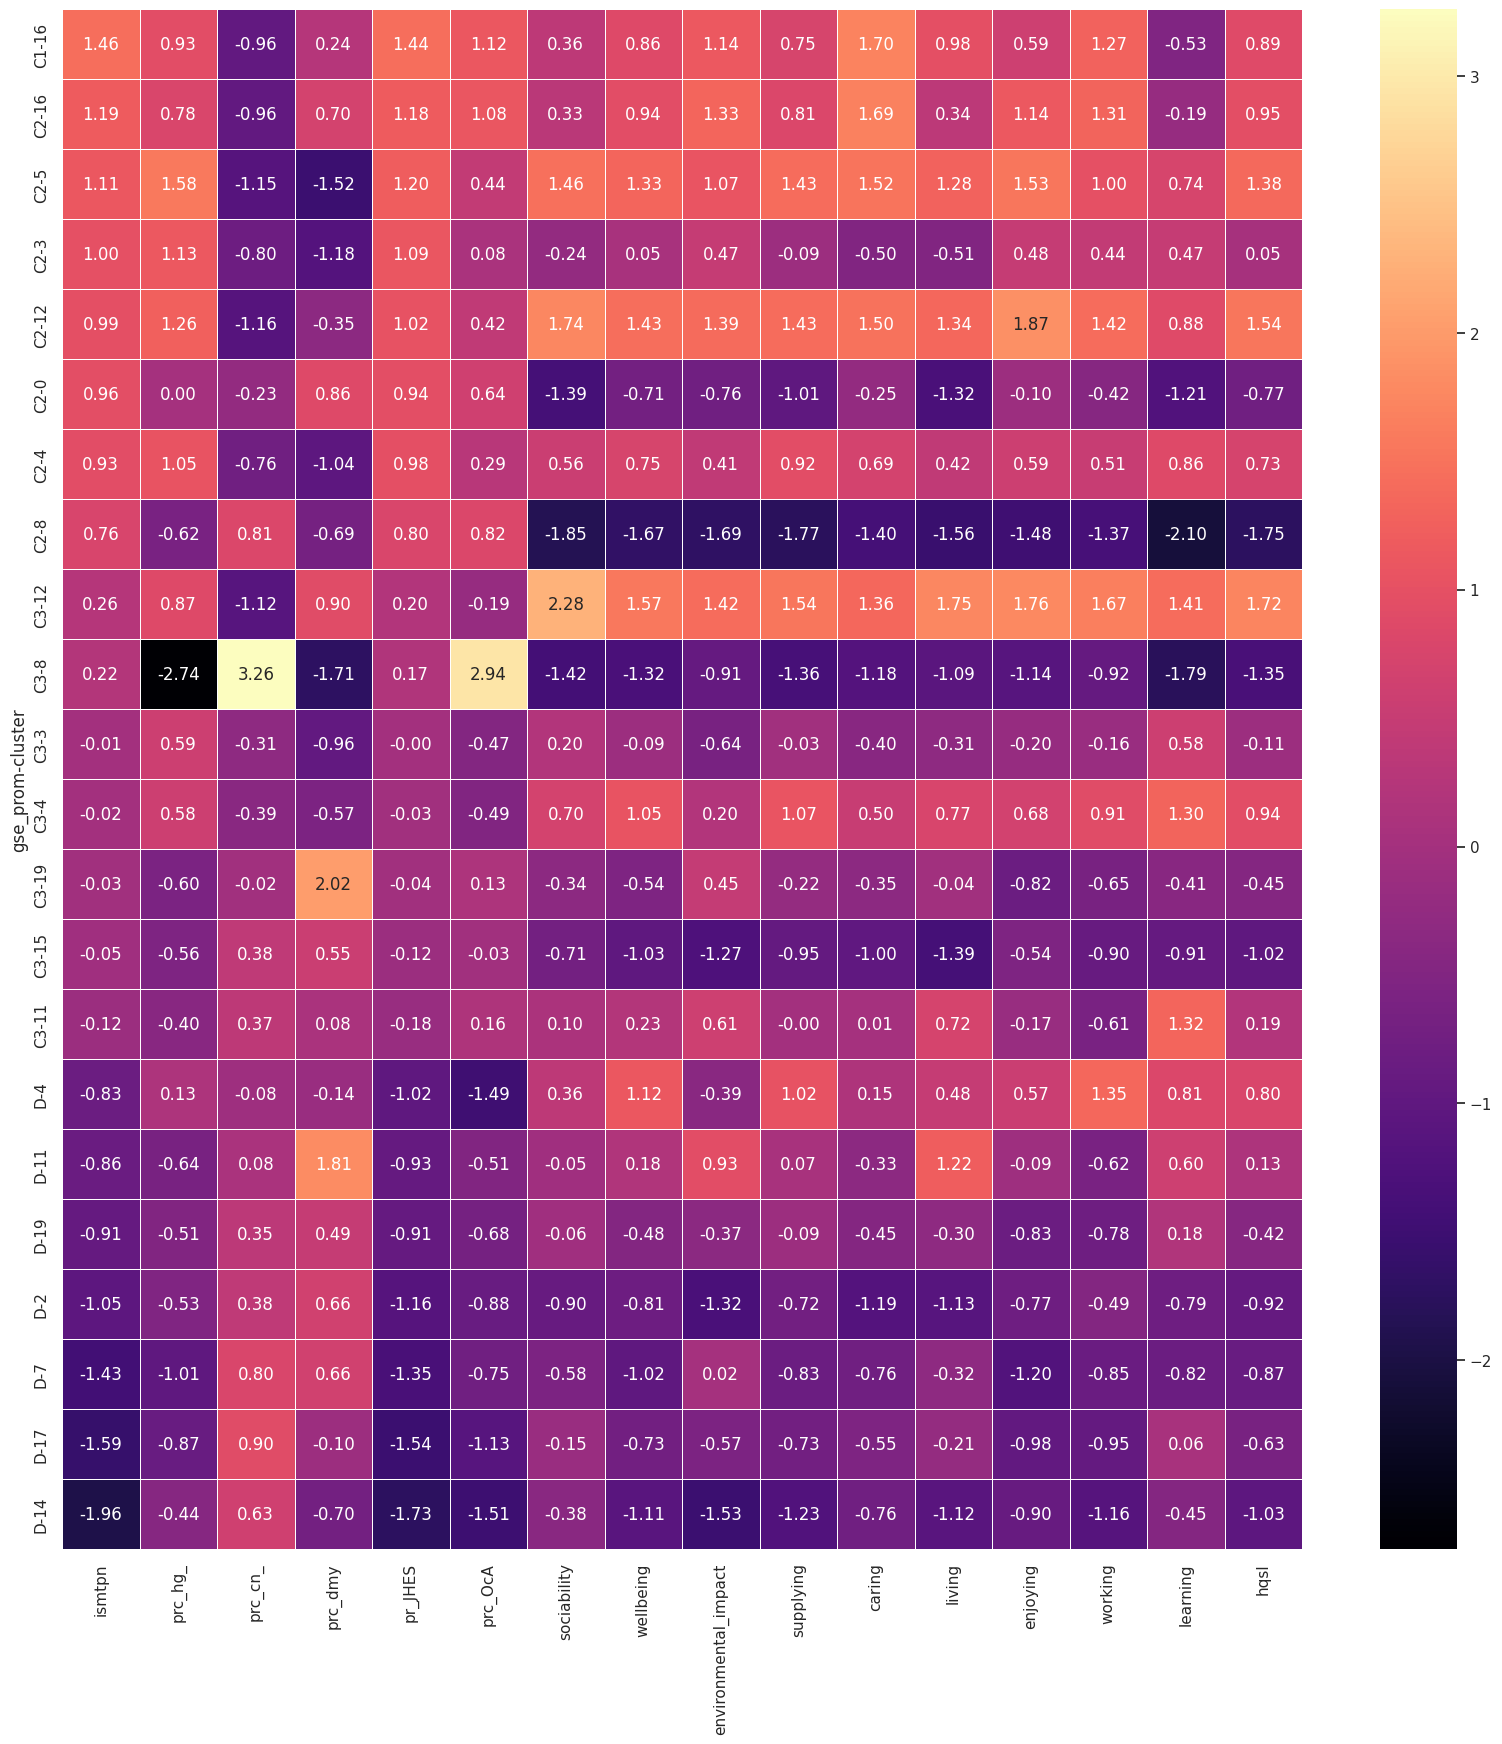

In [16]:
import seaborn as sns
sns.set (rc = {'figure.figsize':(20,20)})
sns.heatmap(gdf_filter.drop(columns=['dens_pobha']), 
            annot=True,fmt=".2f", linewidth=.5, cmap="magma")


## Group socioeconomic behaviour

In [8]:
gdf_santiago = gpd.read_file(grl_dir + 'nivel_socioeconomico/zonas_censales_hogares_RM.shp')
print(gdf_santiago.shape)
gdf_santiago.head(1)

(2376, 36)


,GEOCODI,REGION,NOM_REG,PROVINC,NOM_PRO,COMUNA,NOM_COM,DISTRIT,LOC_ZON,NOM_LOC,...,ACTIV_N_A,ACTIV_N_B,area_ha,Dns_prs,prc_hg_,prc_cn_,prc_dmy,pr_JHES,prc_OcA,geometry
0,13101011001,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,1,1,None,...,978.0,407.0,20.91,103.969393,0.76376,0.107536,0.133785,0.799323,0.828112,"POLYGON ((347618.566 6299105.080, 347612.588 6..."


In [93]:
gdf_alameda = gpd.read_file(grl_dir + 'alameda_cntzonascensales_unidadesvecinalesclusterv3.geojson')
gdf_alameda.shape

(31, 37)

Socioeconomic data

In [125]:
unidad_vecinal = '13101_3'

In [126]:
gdf['area_ha'] = gdf.to_crs("EPSG:32719").area/10000
gdf['pob'] = gdf['dens_pobha'] * gdf['area_ha']

In [127]:
aup.weighted_average(gdf.loc[gdf.geocodigo.isin(gdf_alameda.loc[gdf_alameda.COD_UNICO_==unidad_vecinal].GEOCODI)],
                     'pob', 'ismtpn')

0.7003974862666151

In [118]:
gdf[['gse_prom','ismtpn']].groupby('gse_prom').agg(['max','min'])

ismtpn          
               max       min
gse_prom                    
C1        0.829380  0.772222
C2        0.771948  0.674001
C3        0.673602  0.589637
D         0.589517  0.363799
E         0.254768  0.254768

In [15]:
gdf[['gse_prom','pob']].groupby('gse_prom').agg(['sum'])

,pob
,sum
gse_prom,
C1,4.812780e+05
C2,9.012530e+05
C3,1.033899e+06
D,3.644601e+06
E,3.200000e+01


Hogares con niños

In [128]:
gdf_alameda = gdf_alameda.merge(gdf_santiago[['GEOCODI','hogares','con_nns']],
               left_on='GEOCODI', right_on='GEOCODI')
gdf_alameda

,GEOCODI,REGION,NOM_REG,PROVINC,NOM_PRO,COMUNA,NOM_COM,DISTRIT,LOC_ZON,NOM_LOC,...,Dns_prs,prc_hg_,prc_cn_,prc_dmy,pr_JHES,prc_OcA,COD_UNICO_,geometry,hogares_y,con_nns_y
0,13101051002,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,5,2,None,...,116.697441,0.603075,0.300683,0.098519,0.300114,0.408884,13101_13,POINT (-70.67638 -33.44705),1756.0,528.0
1,13101281001,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,28,1,None,...,75.092478,0.712980,0.221207,0.067642,0.738574,0.740402,13101_18,POINT (-70.66239 -33.44812),547.0,121.0
2,13101281002,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,28,2,None,...,205.407354,0.709345,0.212656,0.080206,0.713024,0.660780,13101_18,POINT (-70.66190 -33.45095),1359.0,289.0
3,13101021001,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,2,1,None,...,150.436300,0.725785,0.236257,0.040576,0.648560,0.683901,13101_3,POINT (-70.65566 -33.43315),1528.0,361.0
4,13101021002,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,2,2,None,...,900.946372,0.774929,0.168803,0.056980,0.780627,0.763533,13101_3,POINT (-70.65634 -33.43676),1404.0,237.0
5,13101021003,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,2,3,None,...,793.123209,0.809663,0.155198,0.035871,0.735725,0.712299,13101_3,POINT (-70.65492 -33.43659),1366.0,212.0
6,13101021004,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,2,4,None,...,217.729084,0.746460,0.204316,0.050573,0.583951,0.639919,13101_3,POINT (-70.65203 -33.43502),1483.0,303.0
7,13101021005,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,2,5,None,...,42.838171,0.713163,0.166012,0.126719,0.513752,0.605108,13101_3,POINT (-70.65140 -33.44146),1018.0,169.0
8,13101021006,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,2,6,None,...,762.461538,0.808333,0.146667,0.045833,0.634167,0.658333,13101_3,POINT (-70.64787 -33.43702),1200.0,176.0
9,13101021007,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,2,7,None,...,310.547397,0.750678,0.162602,0.091238,0.577236,0.548329,13101_3,POINT (-70.64937 -33.43607),1107.0,180.0


<AxesSubplot: >

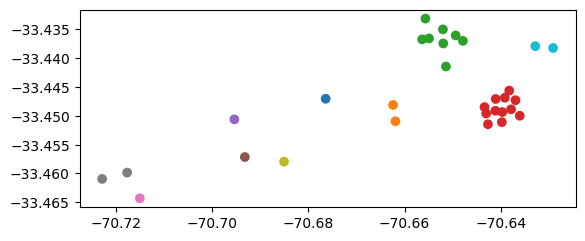

In [129]:
gdf_alameda.plot('COD_UNICO_')

In [131]:
gdf_hogares = gdf_alameda[['COD_UNICO_','con_nns_y','hogares_y']].groupby('COD_UNICO_').sum()
gdf_hogares['prc_total_cn'] = gdf_hogares['con_nns_y'] / gdf_hogares['hogares_y']
gdf_hogares

,con_nns_y,hogares_y,prc_total_cn
COD_UNICO_,,,
13101_13,528.0,1756.0,0.300683
13101_18,410.0,1906.0,0.215110
13101_3,1777.0,9890.0,0.179676
13101_49,2807.0,14736.0,0.190486
13106_06,386.0,1033.0,0.373669
13106_12,531.0,2016.0,0.263393
13106_17,261.0,764.0,0.341623
13106_18,1079.0,2188.0,0.493144
13106_22,527.0,1548.0,0.340439


In [77]:
aup.weighted_average(gdf, 'pob', 'prc_cn_')

0.4487617254307965

In [78]:
gdf['prc_cn_'].mean()

0.4300895607631022

In [79]:
gdf.loc[gdf.geocodigo.isin(alameda.geocodigo), 'prc_cn_'].mean()

0.22501898995693168

In [ ]:
gdf.loc[gdf.geocodigo.isin(alameda.geocodigo), 'prc_cn_'].mean()